<a href="https://colab.research.google.com/github/mltrev23/tech-test/blob/main/5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup Environment

In [ ]:
pip install scikit-learn tensorflow pandas numpy matplotlib seaborn kaggle requests

Download Dataset

In [ ]:
import subprocess

# Define the Kaggle dataset URL
kaggle_url = "sid321axn/gold-price-prediction-dataset"

# Download the dataset
subprocess.run(['kaggle', 'datasets', 'download', '-d', kaggle_url])

CompletedProcess(args=['kaggle', 'datasets', 'download', '-d', 'sid321axn/gold-price-prediction-dataset'], returncode=0)

Unzip the downloaded file

In [ ]:
!unzip gold-price-prediction-dataset.zip

Archive:  gold-price-prediction-dataset.zip
  inflating: FINAL_USO.csv           


Data Loading

In [ ]:
import pandas as pd

# Load the data
data = pd.read_csv('FINAL_USO.csv')

#Display basic information about the dataset
data.info()
data.describe()
print(data.columns)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


Data Preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Select the Adj Close column
data = data[['Date', 'Adj Close']]

# Convert 'Date' to datetime using .loc to avoid the warning
data.loc[:, 'Date'] = pd.to_datetime(data['Date'])

# Sort by date
data = data.sort_values('Date')

# Drop the Date column
data = data.drop('Date', axis=1)

# Scale the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define the function to create sequences
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data)-seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

# Define sequence length
seq_length = 60

# Create sequences
X, y = create_sequences(scaled_data, seq_length)

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

Defining the LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - loss: 0.0481
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0019
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0018
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0016
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0015
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0015
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0014
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0012
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0010
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 0.0011


Defining the GRU Model

In [ ]:
from tensorflow.keras.layers import GRU

# Define the GRU model
gru_model = Sequential()
gru_model.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
gru_model.add(GRU(50, return_sequences=False))
gru_model.add(Dense(25))
gru_model.add(Dense(1))

# Compile the model
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
gru_model.fit(X_train, y_train, batch_size=32, epochs=10)


Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 0.0909
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 8.5897e-04
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 6.8521e-04
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 5.7852e-04
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 5.6712e-04
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 6.7180e-04
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 4.6123e-04
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 4.6667e-04
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 4.6144e-04
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 5.2260e-04


Model Evaluation

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


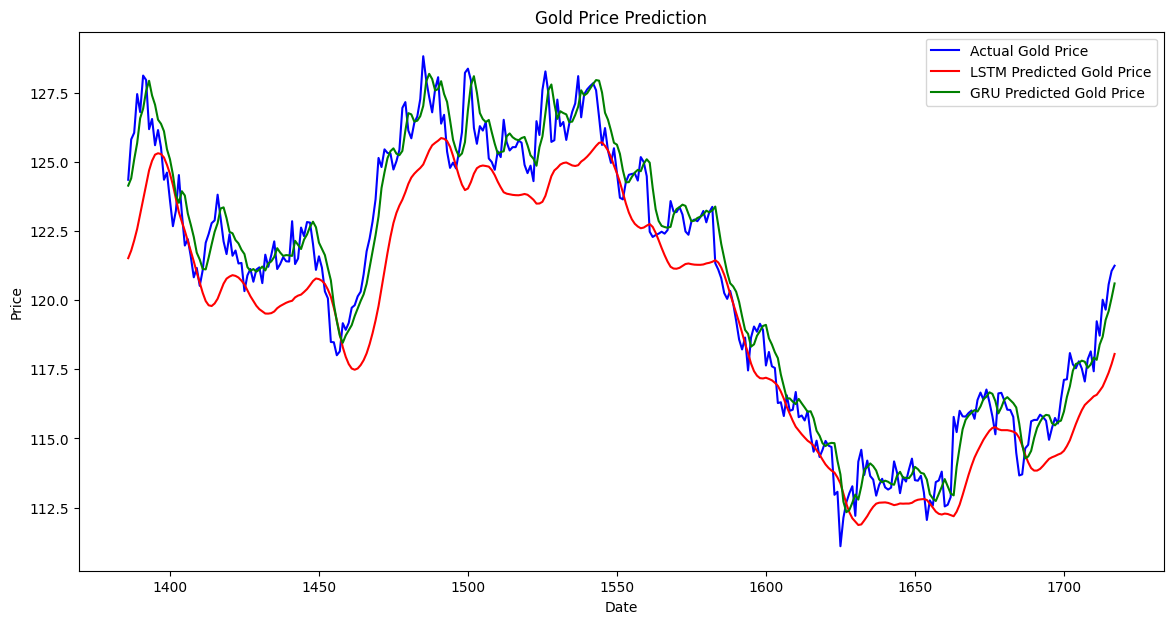

In [ ]:
import matplotlib.pyplot as plt

# Predict using LSTM
predictions_lstm = lstm_model.predict(X_test)
predictions_lstm = scaler.inverse_transform(predictions_lstm)

# Predict using GRU
predictions_gru = gru_model.predict(X_test)
predictions_gru = scaler.inverse_transform(predictions_gru)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data.index[train_size + seq_length:], data['Adj Close'][train_size + seq_length:], color='blue', label='Actual Gold Price')
plt.plot(data.index[train_size + seq_length:], predictions_lstm, color='red', label='LSTM Predicted Gold Price')
plt.plot(data.index[train_size + seq_length:], predictions_gru, color='green', label='GRU Predicted Gold Price')
plt.title('Gold Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Save the Models

In [ ]:
import joblib

# Save the LSTM model
joblib.dump(lstm_model, 'lstm_gold_price_model.pkl')

# Save the GRU model
joblib.dump(gru_model, 'gru_gold_price_model.pkl')

['gru_gold_price_model.pkl']

Deploy the Models with FastAPI

In [ ]:
pip install fastapi uvicorn pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 4.4 MB/s eta 0:00:00


Create fastapi app

In [ ]:
from fastapi import FastAPI
import joblib
import pandas as pd
import tensorflow as tf
from pydantic import BaseModel

# Initialize FastAPI app
app = FastAPI()

# Load the trained models
lstm_model = joblib.load('lstm_gold_price_model.pkl')
gru_model = joblib.load('gru_gold_price_model.pkl')

# Define the input data model
class GoldData(BaseModel):
    sequence: list

@tf.function(reduce_retracing=True)
def predict_with_lstm(input_data):
    return lstm_model(input_data)

@tf.function(reduce_retracing=True)
def predict_with_gru(input_data):
    return gru_model(input_data)

# Define the prediction route for LSTM
@app.post('/predict_lstm')
def predict_gold_price_lstm(data: GoldData):
    # Convert input data to a NumPy array and reshape
    input_data = pd.DataFrame([data.sequence]).values.reshape((1, len(data.sequence), 1))

    # Make the prediction
    prediction = predict_with_lstm(tf.convert_to_tensor(input_data, dtype=tf.float32))

    # Convert numpy.float32 to a Python float
    prediction_value = float(prediction[0][0])

    print(f'LSTM Prediction: {prediction_value}')

    # Return the prediction as a JSON response
    return {'prediction': prediction_value}

# Define the prediction route for GRU
@app.post('/predict_gru')
def predict_gold_price_gru(data: GoldData):
    # Convert input data to a NumPy array and reshape
    input_data = pd.DataFrame([data.sequence]).values.reshape((1, len(data.sequence), 1))

    # Make the prediction
    prediction = predict_with_gru(tf.convert_to_tensor(input_data, dtype=tf.float32))

    # Convert numpy.float32 to a Python float
    prediction_value = float(prediction[0][0])

    print(f'LSTM Prediction: {prediction_value}')

    # Return the prediction as a JSON response
    return {'prediction': prediction_value}


In [ ]:
!ngrok authtoken 2lammpPuDThaunJy6qYTw0YVylF_6XJrWtbYB8dm1XMVY2qh1

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


Run the FastAPI App

In [ ]:
import uvicorn
import nest_asyncio
from pyngrok import ngrok

# Apply the nest_asyncio patch
nest_asyncio.apply()

public_url = ngrok.connect(9003, "http")
print('Public URL:', public_url)

uvicorn.run(app, host='0.0.0.0', port=9003)


Public URL: NgrokTunnel: "https://2a2a-35-190-183-150.ngrok-free.app" -> "http://localhost:9003"


INFO:     Started server process [453]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:9003 (Press CTRL+C to quit)


LSTM Prediction: 0.8717371225357056
INFO:     104.223.86.8:0 - "POST /predict_lstm HTTP/1.1" 200 OK
LSTM Prediction: 0.9110864996910095
INFO:     104.223.86.8:0 - "POST /predict_gru HTTP/1.1" 200 OK
